In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/Classroom/AI심화과정"

/content/drive/MyDrive/Classroom/AI심화과정


In [ ]:
_CUR_DIR = os.path.abspath(os.curdir)
print(f"My current directory : {_CUR_DIR}")
_DATA_DIR = os.path.join(_CUR_DIR, "pretest_data.csv")

My current directory : /content/drive/MyDrive/Classroom/AI심화과정


In [ ]:
# nsmc/ratings_train.txt를 DataFrame 형태로 불러오기
df = pd.read_csv(_DATA_DIR)

In [ ]:
df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


In [ ]:
len(df)

2644

In [ ]:
df.describe()

,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000
mean,20.234493,35.795386,9.534819e+05,1.432732e+06,5.465813e+04,6.845384e+04,534.279879,860.402421,9.032085e+03,1.111202e+04,1.742059e+06,1.748095e+06,8.639525e+08,8.665469e+08,9276.285174,9229.746596
std,12.833115,10.376753,3.200375e+06,6.836354e+06,3.239337e+05,4.983217e+05,2070.643487,4754.238395,1.155321e+05,1.574601e+05,5.546694e+06,5.569829e+06,2.511740e+09,2.518026e+09,43156.370481,43100.803783
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.531600e+04,5.531600e+04,1.000000,1.000000
25%,9.000000,28.000000,2.353520e+05,3.068540e+05,4.208500e+03,4.932750e+03,86.000000,108.000000,5.110000e+02,5.977500e+02,1.480000e+05,1.507500e+05,3.698228e+07,3.780661e+07,118.000000,118.000000
50%,19.000000,37.000000,4.279245e+05,5.715080e+05,7.851000e+03,9.507000e+03,159.000000,211.000000,1.157000e+03,1.311500e+03,4.670000e+05,4.695000e+05,1.215355e+08,1.223838e+08,326.500000,327.500000
75%,30.000000,45.000000,8.268800e+05,1.119499e+06,1.688350e+04,2.085950e+04,315.000000,435.000000,2.720000e+03,3.150750e+03,1.272500e+06,1.282500e+06,4.857386e+08,4.878799e+08,1245.250000,1244.500000
max,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000


In [ ]:
df.isnull().values.any()

True

In [ ]:
#na 값 확인
df.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [ ]:
#video_id를 사용하여 중복값 확인
df.video_id.nunique()

2643

In [ ]:
#(전체기간 카테고리->채널->비디오 개수)전체기간 동안 채널 별 인기동영상 개수
df.groupby(df["channel_id"]).size()

channel_id
CH-0C8y    7
CH-9RQC    1
CH-BqPA    2
CH-Bsa2    2
CH-FQUI    3
          ..
CHzjiRW    2
CHznImS    1
CHzt24f    1
CHzxXBQ    1
CHzz58-    2
Length: 940, dtype: int64

In [ ]:
df.groupby(df["channel_id"]).size()[df.groupby(df["channel_id"]).size()==17]

channel_id
CHQ2O-i    17
dtype: int64

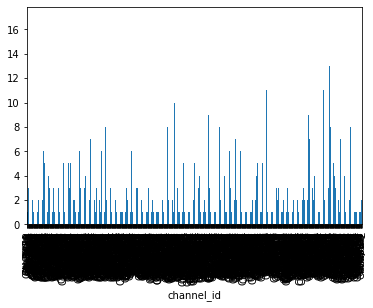

In [ ]:
df.groupby(df["channel_id"]).size().plot.bar()

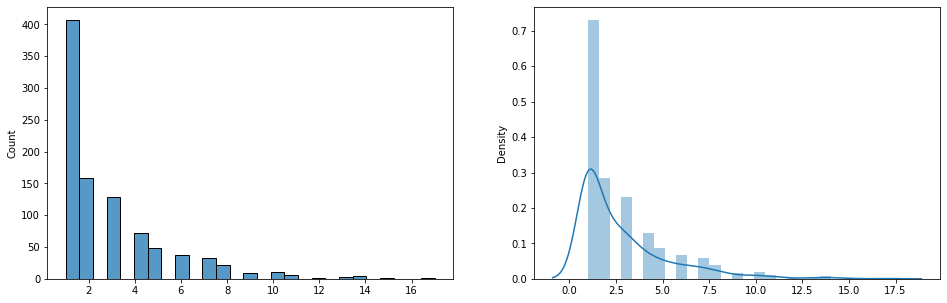

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df.groupby(df["channel_id"]).size())
plt.subplot(1,2,2)
sns.distplot(df.groupby(df["channel_id"]).size())
plt.show()

In [ ]:
#월단위 구분을 위하여 변수 생성
df["published_month"] = ['-'.join(a.split('-')[:2]) for a in df["published_date"]]

In [ ]:
#(월별 카테고리->채널->비디오 개수) 
df.groupby([df["published_month"], df["channel_id"]]).size()

published_month  channel_id
2021-03          CH12YJZ       1
                 CH2qVOO       1
                 CH46BbE       2
                 CH4LW3s       1
                 CH5BMQO       2
                              ..
2021-07          CHzCedB       3
                 CHzIOIS       1
                 CHzgNzU       2
                 CHzxXBQ       1
                 CHzz58-       1
Length: 1666, dtype: int64

In [ ]:
for month in list(set(df["published_month"].values)):
  print(df.groupby([df["published_month"][df["published_month"]==month], df["channel_id"]]).size())

published_month  channel_id
2021-03          CH12YJZ       1
                 CH2qVOO       1
                 CH46BbE       2
                 CH4LW3s       1
                 CH5BMQO       2
                              ..
                 CHvW8no       1
                 CHweOkP       1
                 CHyCL5k       1
                 CHyn-K7       1
                 CHyuL_X       1
Length: 66, dtype: int64
published_month  channel_id
2021-04          CH-0C8y       2
                 CH-BqPA       2
                 CH-Bsa2       1
                 CH-IBt8       1
                 CH-VOS6       1
                              ..
                 CHyozK5       1
                 CHz2Kbg       1
                 CHzCedB       2
                 CHzRDCw       1
                 CHzjDgV       1
Length: 420, dtype: int64
published_month  channel_id
2021-05          CH-0C8y       1
                 CH-Bsa2       1
                 CH-Jblc       1
                 CH-KafR       1
       

In [ ]:
new_data = pd.DataFrame({"channel_id": df[df["published_month"]=='2021-03'].groupby(df["channel_id"]).size().keys().to_list(), "Values": df[df["published_month"]=='2021-03'].groupby(df["channel_id"]).size().values})

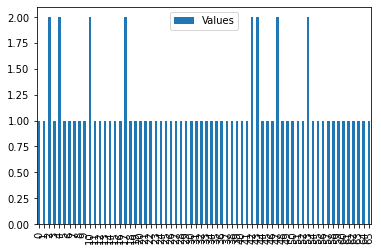

In [ ]:
new_data.plot.bar()

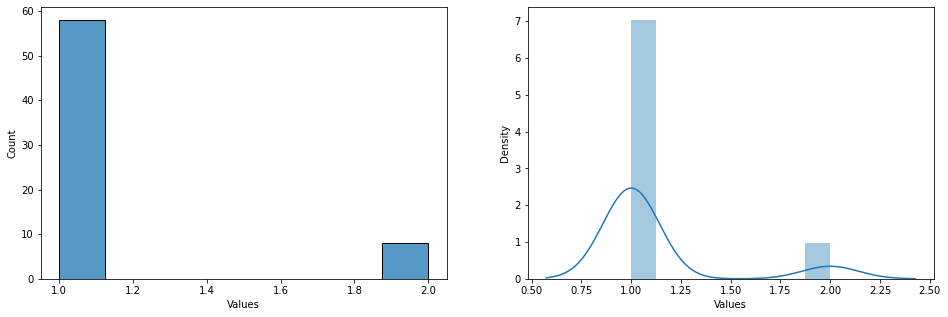

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_data["Values"])
plt.subplot(1,2,2)
sns.distplot(new_data["Values"])
plt.show()

In [ ]:
set(df['published_month'].values)

{'2021-03', '2021-04', '2021-05', '2021-06', '2021-07'}

In [ ]:
month_list = list(set(df['published_month'].values))

In [ ]:
month_list

['2021-03', '2021-04', '2021-05', '2021-06', '2021-07']

In [ ]:
#월별 TOP10 채널 (분류 기준은 비디오 개수)

In [ ]:
#같은 수의 채널은 인기동영상에 오래 머문 순서로 정렬

In [ ]:
#채널의 비디오 포함 개수가 같은 경우: 채널에 포함된 동영상의 조회수가 많은 순으로 정렬
month_top_list = []
for month in month_list:
  channel_list = df['published_month'][df['published_month'] == month].groupby(df["channel_id"]).size().index.to_list()
  for a_channel in channel_list:
    month_top_list.append((month, a_channel, len(df[df['published_month'] == month][df['channel_id'] == a_channel]), max(df[df['published_month'] == month][df['channel_id'] == a_channel]['on_views'])))

In [ ]:
month_top_list.sort(key=lambda x: (x[0], x[2], x[3]), reverse=True)

In [ ]:
month_top_list

In [ ]:
three_month_top_list = sorted(month_top_list, key=lambda x: (x[0]=='2021-03', x[2], x[3]), reverse=True)[:10]

In [ ]:
three_month_top_list

[('2021-03', 'CH920m3', 2, 1409041),
 ('2021-03', 'CHicKQU', 2, 1262201),
 ('2021-03', 'CH5BMQO', 2, 1176510),
 ('2021-03', 'CHG9aFJ', 2, 932967),
 ('2021-03', 'CHaKod3', 2, 852156),
 ('2021-03', 'CHaZS_X', 2, 466251),
 ('2021-03', 'CH46BbE', 2, 226941),
 ('2021-03', 'CHnet0I', 2, 152606),
 ('2021-03', 'CHEf_Bc', 1, 9205421),
 ('2021-03', 'CHweOkP', 1, 8553414)]

In [ ]:
#주별 TOP5 채널 (분류 기준은 비디오 개수)

In [ ]:
#인기동영상 별 업데이트 주차수 표기
df["published_week"] = [datetime.date(datetime.strptime(df['published_date'][a], "%Y-%m-%d")).isocalendar()[1] for  a in range(len(df['published_date']))]

In [ ]:
df["published_week"].head()

0    26
1    25
2    28
3    22
4    27
Name: published_week, dtype: int64

In [ ]:
weeks = list(set(df['published_week'].values))
weeks

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

In [ ]:
#채널의 비디오 포함 개수가 같은 경우: 채널에 포함된 동영상의 조회수가 많은 순으로 정렬
week_top_list = []
for week in weeks:
  channel_list = df['published_week'][df['published_week'] == week].groupby(df["channel_id"]).size().index.to_list()
  for a_channel in channel_list:
    week_top_list.append((week, a_channel, len(df[df['published_week'] == week][df['channel_id'] == a_channel]), max(df[df['published_week'] == week][df['channel_id'] == a_channel]['on_views'])))

In [ ]:
week_12_top_list = sorted(week_top_list, key=lambda x: (x[0]==12, x[2], x[3]), reverse=True)[:5]

In [ ]:
week_12_top_list

[(12, 'CHnet0I', 2, 152606),
 (12, 'CHweOkP', 1, 8553414),
 (12, 'CHicKQU', 1, 1262201),
 (12, 'CH7Krez', 1, 1121118),
 (12, 'CH2qVOO', 1, 1101249)]

In [ ]:
#월별 / 카테고리별: 태그 키워드 순위

In [ ]:
category_list = list(set(df['category_name'].values))
category_list

['News & Politics',
 'Sports',
 'Comedy',
 'Gaming',
 'Film & Animation',
 'Howto & Style',
 'Autos & Vehicles',
 'Nonprofits & Activism',
 'Pets & Animals',
 'Music',
 'Entertainment',
 'People & Blogs',
 'Travel & Events',
 'Education',
 'Science & Technology']

In [ ]:
category_by_month = defaultdict(list)

In [ ]:
for category in category_list:
  for month in month_list:
    data = []
    for a in df[df['category_name']==category][df['published_month'] == month]['tags'].dropna(how = 'any').values:
      data += a.split('|')
    category_by_month[category+'|'+month] = data

In [ ]:
category_by_month.keys()

dict_keys(['News & Politics|2021-03', 'News & Politics|2021-04', 'News & Politics|2021-05', 'News & Politics|2021-06', 'News & Politics|2021-07', 'Sports|2021-03', 'Sports|2021-04', 'Sports|2021-05', 'Sports|2021-06', 'Sports|2021-07', 'Comedy|2021-03', 'Comedy|2021-04', 'Comedy|2021-05', 'Comedy|2021-06', 'Comedy|2021-07', 'Gaming|2021-03', 'Gaming|2021-04', 'Gaming|2021-05', 'Gaming|2021-06', 'Gaming|2021-07', 'Film & Animation|2021-03', 'Film & Animation|2021-04', 'Film & Animation|2021-05', 'Film & Animation|2021-06', 'Film & Animation|2021-07', 'Howto & Style|2021-03', 'Howto & Style|2021-04', 'Howto & Style|2021-05', 'Howto & Style|2021-06', 'Howto & Style|2021-07', 'Autos & Vehicles|2021-03', 'Autos & Vehicles|2021-04', 'Autos & Vehicles|2021-05', 'Autos & Vehicles|2021-06', 'Autos & Vehicles|2021-07', 'Nonprofits & Activism|2021-03', 'Nonprofits & Activism|2021-04', 'Nonprofits & Activism|2021-05', 'Nonprofits & Activism|2021-06', 'Nonprofits & Activism|2021-07', 'Pets & Animal

In [ ]:
best_tags = sorted(Counter(category_by_month['News & Politics|2021-06']).items(), key=lambda x: (x[1], x[0]), reverse=True)[:20]
best_tags

[('뉴스', 6),
 ('뉴스투데이', 3),
 ('뉴스데스크', 3),
 ('광주', 3),
 ('경찰', 3),
 ('news', 3),
 ('News Network', 3),
 ('MBC뉴스', 3),
 ('투자', 2),
 ('철거', 2),
 ('주식', 2),
 ('제보영상', 2),
 ('제보', 2),
 ('정오뉴스', 2),
 ('재테크', 2),
 ('장갑차', 2),
 ('인터뷰', 2),
 ('유상철', 2),
 ('에스비에스 뉴스', 2),
 ('에스비에스', 2)]

In [ ]:
#월별: 태그 키워드 순위

In [ ]:
tag_by_month = defaultdict(list)

In [ ]:
for month in month_list:
  data = []
  for a in df[df['published_month'] == month]['tags'].dropna(how = 'any').values:
    data += a.split('|')
    tag_by_month[month] = data

In [ ]:
tag_by_month.keys()

dict_keys(['2021-03', '2021-04', '2021-05', '2021-06', '2021-07'])

In [ ]:
best_tags = sorted(Counter(tag_by_month['2021-03']).items(), key=lambda x: (x[1], x[0]), reverse=True)[:20]
best_tags

[('박수홍', 5),
 ('몰카', 5),
 ('유재석', 4),
 ('웃긴영상', 4),
 ('먹방', 4),
 ('고양이', 4),
 ('idol', 4),
 ('eng', 4),
 ('KBS', 4),
 ('횡령', 3),
 ('특전사', 3),
 ('특수부대', 3),
 ('참호격투', 3),
 ('예능', 3),
 ('아이유', 3),
 ('아이돌', 3),
 ('밀리터리', 3),
 ('런닝맨', 3),
 ('뉴스', 3),
 ('꿀잼', 3)]

In [ ]:
#Q2

In [ ]:
df['diff_data'] = [(datetime.strptime(df['on_trending_date'][a], "%Y-%m-%d") - datetime.strptime(df['published_date'][a], "%Y-%m-%d")).days for a in range(len(df))]

In [ ]:
Counter(df['diff_data'])

Counter({1: 153, 2: 2237, 3: 202, 4: 41, 5: 7, 6: 4})

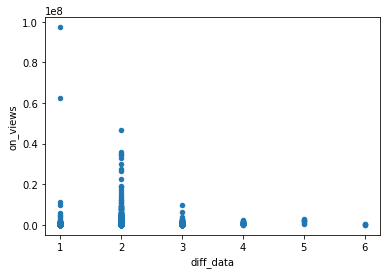

In [ ]:
#업로드 이후 인기 동영상이 되기까지의 기간 시각화
df.plot.scatter(x='diff_data', y='on_views')

In [ ]:
len(df['on_views'][(df['diff_data'] == 1) | (df['diff_data'] == 2)])

2390

In [ ]:
df_view = pd.DataFrame(df[(df['diff_data'] == 1) | (df['diff_data'] == 2)])

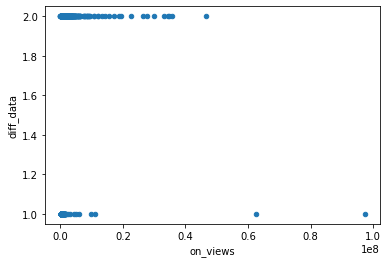

In [ ]:
df_view.plot.scatter(y='diff_data', x='on_views')

In [ ]:
#이상치를 제거 후 데이터를 분포를 보기 위한 코드

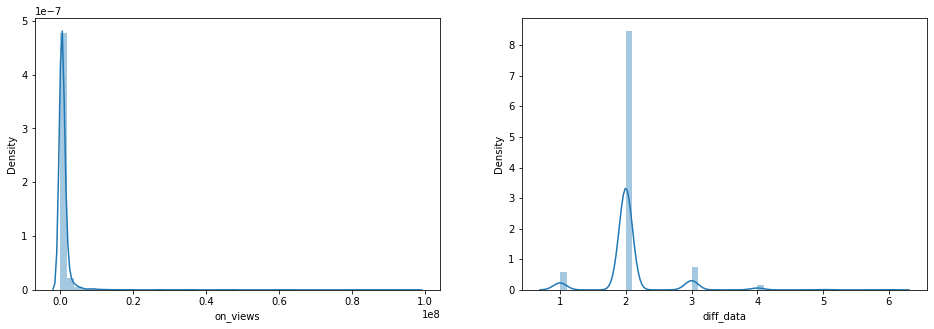

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['on_views'])
plt.subplot(1,2,2)
sns.distplot(df['diff_data'])
plt.show()

In [ ]:
print("Highest allowed",df['on_views'].mean() + 0.2*df['on_views'].std())
print("Lowest allowed",df['on_views'].mean() - 0.2*df['on_views'].std())

Highest allowed 1593556.8279468175
Lowest allowed 313406.99580507353


In [ ]:
df[(df['on_views'] > 10554605) | (df['on_views'] < -8647641)]

In [ ]:
upper_limit = df['on_views'].mean() + 0.2*df['on_views'].std()
lower_limit = df['on_views'].mean() - 0.2*df['on_views'].std()

In [ ]:
df['on_views'] = np.where(
    df['on_views']>upper_limit,
    upper_limit,
    np.where(
        df['on_views']<lower_limit,
        lower_limit,
        df['on_views']
    )
)

In [ ]:
df['on_views'].describe()

count    2.644000e+03
mean     6.408534e+05
std      4.314914e+05
min      3.134070e+05
25%      3.134070e+05
50%      4.279245e+05
75%      8.268800e+05
max      1.593557e+06
Name: on_views, dtype: float64

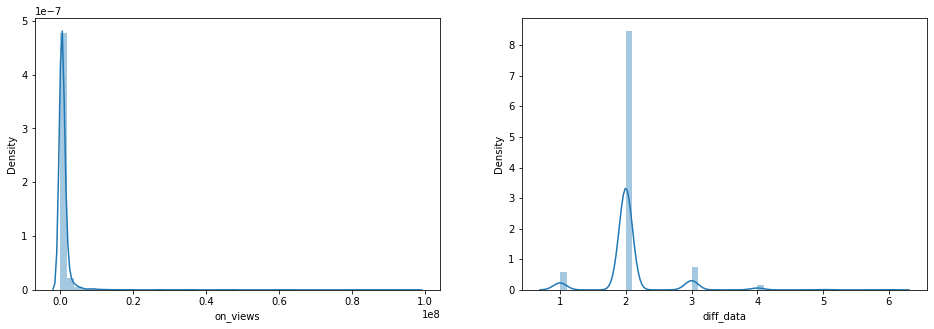

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['on_views'])
plt.subplot(1,2,2)
sns.distplot(df['diff_data'])
plt.show()

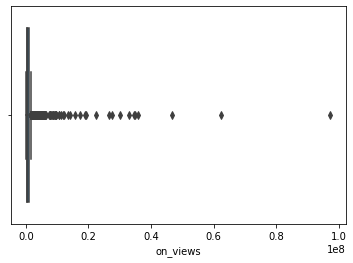

In [ ]:
sns.boxplot(df['on_views'])

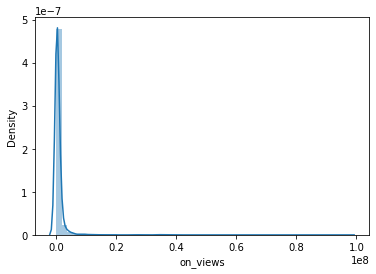

In [ ]:
sns.distplot(df['on_views'])

In [ ]:
#편향된 데이터의 이상치를 제거하기 위하여
#IQR을 사용하여 데이터 시각화

In [ ]:
percentile25 = df['on_views'].quantile(0)
percentile75 = df['on_views'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
iqr

826880.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
upper_limit

2067200.0

In [ ]:
lower_limit

-1240320.0

In [ ]:
df['on_views'][df['on_views'] > upper_limit]
df['on_views'][df['on_views'] < lower_limit]

Series([], Name: on_views, dtype: int64)

In [ ]:
new_df = df[df['on_views'] < upper_limit]
new_df.shape

(2467, 28)

In [ ]:
#편차를 줄이기 위하여 다수의 이상치를 제거하여도 
#여전히 동영상이 편향되어 분포된 것을 알 수 있음

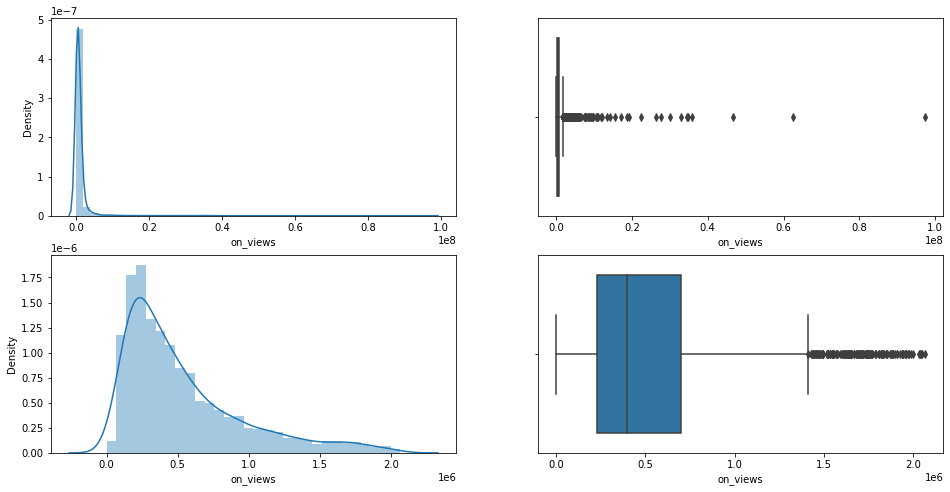

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['on_views'])
plt.subplot(2,2,2)
sns.boxplot(df['on_views'])
plt.subplot(2,2,3)
sns.distplot(new_df['on_views'])
plt.subplot(2,2,4)
sns.boxplot(new_df['on_views'])
plt.show()

In [ ]:
df_view = df[(df['diff_data'] == 1) | (df['diff_data'] == 2)]

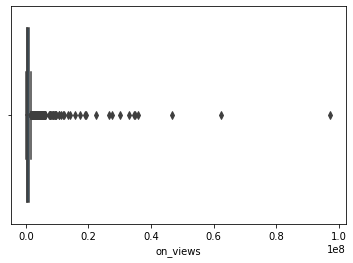

In [ ]:
sns.boxplot(df_view['on_views'])

In [ ]:
percentile25 = df_view['on_views'].quantile(0)
percentile75 = df_view['on_views'].quantile(0.5)

In [ ]:
iqr = percentile75 - percentile25
iqr

430413.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
df_view['on_views'][df_view['on_views'] > upper_limit]
df_view['on_views'][df_view['on_views'] < lower_limit]

Series([], Name: on_views, dtype: int64)

In [ ]:
new_df = df_view[df_view['on_views'] < upper_limit]
new_df.shape

(1960, 26)

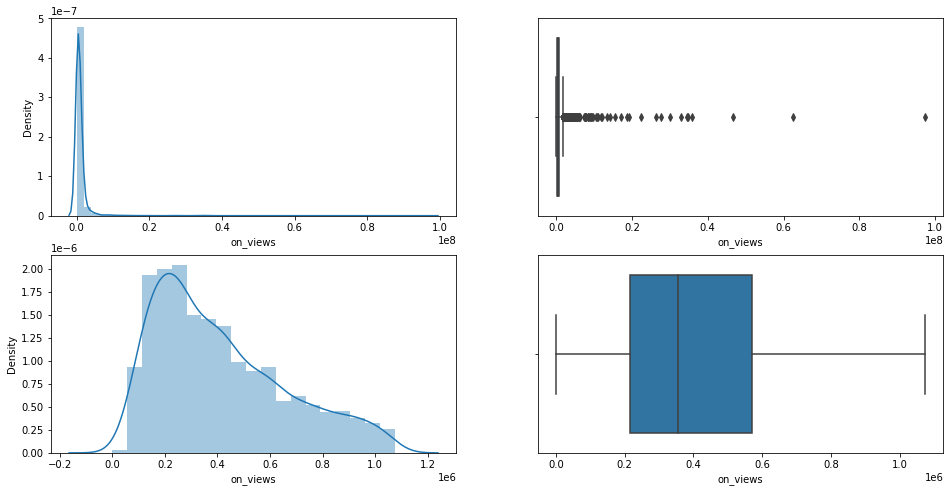

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_view['on_views'])
plt.subplot(2,2,2)
sns.boxplot(df_view['on_views'])
plt.subplot(2,2,3)
sns.distplot(new_df['on_views'])
plt.subplot(2,2,4)
sns.boxplot(new_df['on_views'])
plt.show()